# Ricci curvature for graphs


This program includes a LP solver for EMD problem. Computes Ric(u,v) and Ric(u)

Input: Undirected Unweighted graph G

Output: Ric (u,v), Ric(u)

# Preamble

In [210]:
import matplotlib.pyplot as plt
import networkx as nx
#import networkit as nk
import cvxpy as cp
import numpy as np
from numpy import genfromtxt
import ot
import pytest

# Load Input

In [211]:
# Loading Data
CONTROL_PATH = "../data/control11.txt"
DISEASE_PATH = "../data/disease.txt"

In [212]:
# How to convert the string to 2D array
# np.array2string(x, precision=2, separator=',',
# ...                       suppress_small=True)

In [213]:
# Converting the data from String to 2D array
# import re, ast
# file_content = open(INPUT_PATH, 'r').read()
# parsed = re.sub('\s+', ',', file_content)
# l = ast.literal_eval(file_content)
# A = np.array(l)
# G = nx.from_numpy_matrix(A)

In [214]:
#l

# Convert 2D Array File to Graph

## Control Network

In [215]:
import re, ast
control_matrix = open(CONTROL_PATH, 'r').read()
control_matrix = re.sub('\s+', ',', control_matrix)
A = np.array(ast.literal_eval(control_matrix))
G_control = nx.from_numpy_matrix(A)

# # Python code to demonstrate converting  
# # string representation of list to list 
# # using strip and split 
  
# # initializing string representation of a list 
# ini_list = matrix
  
# # printing initialized string of list and its type 
# # print ("initial string", ini_list) 
# print (type(ini_list)) 
  
# # Converting string to list 
# res = ini_list.strip('][').split(', ') 
  
# # printing final result and its type 
# print ("final list", res) 
# print (type(res)) 

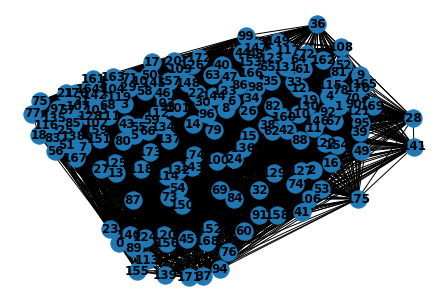

In [220]:
 nx.draw(G_control, with_labels=True, font_weight='bold')

In [217]:
# G = nx.karate_club_graph()

In [235]:
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)

177 7943


In [236]:
G.degree(176)

92

## Disease Network

In [237]:
disease_matrix = open(DISEASE_PATH, 'r').read()
disease_matrix = re.sub('\s+', ',', disease_matrix)
B = np.array(ast.literal_eval(disease_matrix))
G_disease = nx.from_numpy_matrix(B)
# print(disease_matrix)

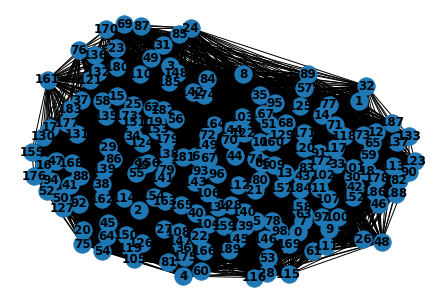

In [238]:
 nx.draw(G_disease, with_labels=True, font_weight='bold')

In [240]:
G_disease.number_of_nodes()

190

In [241]:
G_disease.number_of_edges()

7955

In [243]:
G_disease.degree(189)

80

# 1. Ricci curvature for an edge {u, v} (denoted by Ric(u, v))

## 1.1 Unweighted Version

In [222]:
def get_weights(u,G):
    """return a list of weights for neighbors of node u From the point of view of node u """
    w = 1 / (1 + G.degree(u))
    length = G.degree(u) + 1
    return [w] * length
    
def get_distances(u, v, G):
    """distnace of node x_i and y_j for each pair neighbors of u and v """
    distances = [[nx.shortest_path_length(G,i,j) for j in list(G.neighbors(v))+[v]] for i in list(G.neighbors(u))+[u]]
    return distances

In [223]:
def EMD(u, v, G):
    """returns erth mover distance for the give pair of nodes -- where u and v are adjacent"""
    # a,b are 1D histograms (sum to 1 and positive)
    a = get_weights(u, G)
    b = get_weights(v, G)
    # M is the ground cost matrix
    M = get_distances(u, v, G)
    T = ot.emd(a,b,M) # exact linear programb
    W = ot.emd2(a,b,M) # Wasserstein distance / EMD value
    return  W

In [224]:
def Ric(u, v, G):
    return 1-EMD(u,v, G)

In [225]:
#get_weights(24)

In [226]:
#get_weights(25)

In [227]:
#get_distances(24,25)

In [228]:
ot.emd(get_weights(24, G_control),get_weights(25, G_control),get_distances(24,25, G_control))

array([[0.00854701, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00854701, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00854701,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [229]:
print(EMD(24,25, G_control))

0.3609536662168244


In [230]:
print(Ric(24,25, G_control))

0.6390463337831755


### 1.1.1 Calculating ricci curvature of edge(21,111) in control network

#### 1. Assuming the graph is unweighted and using dijkstra to get the shortest distances (summation of edge numbers)

In [231]:
#get_distances(21,111, G_control)
# [[(nx.shortest_path_length(G_control,i,j),
#    nx.shortest_path(G_control, i, j)) for j in list(G.neighbors(21))+[21]] for i in list(G.neighbors(111))+[111]]

In [232]:
print(Ric(21,111, G_control))

0.8427235674898105


#### 2. Assuming the graph is weighted and using Bellman-Ford to get the shortest distances (summation of the log of edges)

### 1.1.2 Calculating ricci curvature of edge(166,157) in disease network

#### 1. Assuming the graph is unweighted and using dijkstra to get the shortest distances (summation of edge weights)

In [233]:
# [[(nx.shortest_path_length(G_disease,i,j),
#    nx.shortest_path(G_disease, i, j)) for j in list(G.neighbors(166))+[166]] for i in list(G.neighbors(157))+[157]]

In [234]:
print(Ric(166,175, G_disease))

0.8158263305322129


#### 2. Assuming the graph is weighted and using Bellman-Fors to get the shortest distances (summation of the log of edges)

## 1.2 weighted Version

In [245]:
def get_weights2(u,G):
    """return a list of weights for neighbors of node u From the point of view of node u """
    w = 1 / (1 + G.degree(u))
    length = G.degree(u) + 1
    return [w] * length

In [246]:
def get_distances2(u, v, G):
    """distnace of node x_i and y_j for each pair neighbors of u and v """
    distances = [[nx.shortest_path_length(G,i,j) for j in list(G.neighbors(v))+[v]] for i in list(G.neighbors(u))+[u]]
    return distances

# Test

In [173]:
print(G_control.number_of_nodes(), G_disease.number_of_nodes())

177 190


In [175]:
print(G_control.number_of_edges(), G_disease.number_of_edges())

7943 7955


In [206]:
nx.shortest_path(G_control, source=21, target=111)

[21, 111]

In [207]:
nx.shortest_path_length(G_control,21,111)

1

In [208]:
nx.shortest_path(G_disease, source=166, target=175)

[166, 175]

In [209]:
nx.shortest_path_length(G_disease,166,175)

1

# Example

In [139]:
X = nx.Graph()
X.add_node(24)
X.add_node(25)
X.add_edges_from([(i, 24) for i in G.neighbors(24)])
X.add_edges_from([(i, 25) for i in G.neighbors(25)])

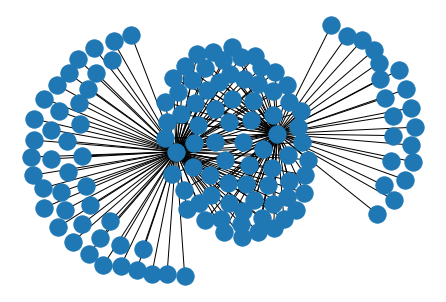

In [180]:
nx.draw(X, with_lables=True, font_weight='bold')

In [191]:
# [[(nx.shortest_path_length(X,i,j), 
#    nx.shortest_path(X, i, j)) for j in list(G.neighbors(24))+[24]] for i in list(G.neighbors(25))+[25]]

In [193]:
#[[(nx.shortest_path_length(G_control,i,j), nx.shortest_path(G_control, i, j)) for j in list(G.neighbors(24))+[24]] for i in list(G.neighbors(25))+[25]]

In [116]:
nx.adjacency_matrix(G_control)

<177x177 sparse matrix of type '<class 'numpy.float64'>'
	with 15886 stored elements in Compressed Sparse Row format>

In [182]:
min(map(lambda x: x[2]['weight'], G_control.edges.data()))      

9.94511866e-06

3. Assuming the graph is weighted and distances are the multiplication of edge weights
   In order to run dijstra to get shortest distances take log of the graph
   log will cause the weights to be negative
   -----------------> figure out a way to run dijstra on this negative graph

# 2. Ricci curvature for a node u (denoted by Ric(u))

In [19]:
def Ricci(u):
    sum = 0
    for x in G.neighbors(u):
        sum += Ric(u,x)
    return sum/G.degree(u)

In [20]:
Ricci(24)

0.5671300200682159

# 3. Some simple observations for Ric(u, v)


In [331]:
from numpy import array
def TV(u,v):
    Nbr_u = sorted(nx.neighbors(G, u))
    Nbr_v = sorted(nx.neighbors(G, v))
    l = sorted(nx.common_neighbors(G, u, v))
    k = [i for i in Nbr_u  if i not in l] 
    m = [i for i in Nbr_v  if i not in l] 
    u_vec = [1/(nx.degree(G,u)+1) for i in Nbr_u] + [1/(nx.degree(G,u)+1)] +[0 for i in m] + [1/(nx.degree(G,u)+1)]
    v_vec = [0 for i in k] + [1/(nx.degree(G,v)+1) for i in Nbr_v] + [1/(nx.degree(G,v)+1)] + [1/(nx.degree(G,v)+1)]
    tv_vec = np.array(u_vec) - np.array(v_vec) 
    tv = 0
    for x in tv_vec:
        tv = tv + (1/2) * x 
    return tv

In [332]:
def TV2(u,v):
    Nbr_u = sorted(nx.neighbors(G, u))
    Nbr_v = sorted(nx.neighbors(G, v))
    l = sorted(nx.common_neighbors(G, u, v))
    k = [i for i in Nbr_u  if i not in l] 
    m = [i for i in Nbr_v  if i not in l] 
    tv = ((len(k) + len(l))/2 + 1) / (nx.degree(G,u) + 1) + ((len(m) - len(l))/2 - 1) / (nx.degree(G,v) + 1)
    return tv

In [339]:
# sorted(nx.neighbors(G, 24))

In [340]:
#sorted(nx.neighbors(G, 25))

In [341]:
#sorted(nx.common_neighbors(G, 24, 25))

In [343]:
TV(25,24)  #WrongValueThroughDefinition

0.0009896536212327554

In [344]:
TV2(25,24) #RightValueThroughFormulation

0.3685110211426001

In [345]:
Ric(24,25)

0.6390463337831755